In [1]:
import pandas as pd
import numpy as np

In [2]:
cardata = pd.read_csv('C:/Users/Manav/OneDrive/Documents/projects/cardata.csv')

In [3]:
cardata


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
print(cardata['Seller_Type'].unique())
print(cardata['Transmission'].unique())
print(cardata['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
final_df = cardata.drop(['Car_Name'],axis=1)

In [7]:
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
final_df['Car_Age'] = 2020 - final_df['Year']

In [48]:
final_cardata = final_df.drop(['Year'],axis=1)


In [49]:
final_cardata = pd.get_dummies(final_cardata ,drop_first=True)

In [50]:
final_cardata.head(100)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
95,5.85,18.61,72000,0,8,0,1,0,1
96,20.75,25.39,29000,0,4,1,0,0,0
97,17.00,18.64,8700,0,3,0,1,0,1
98,7.05,18.61,45000,0,7,0,1,0,1


In [51]:
final_cardata.corr()
import seaborn as sns
import matplotlib.pyplot as plt

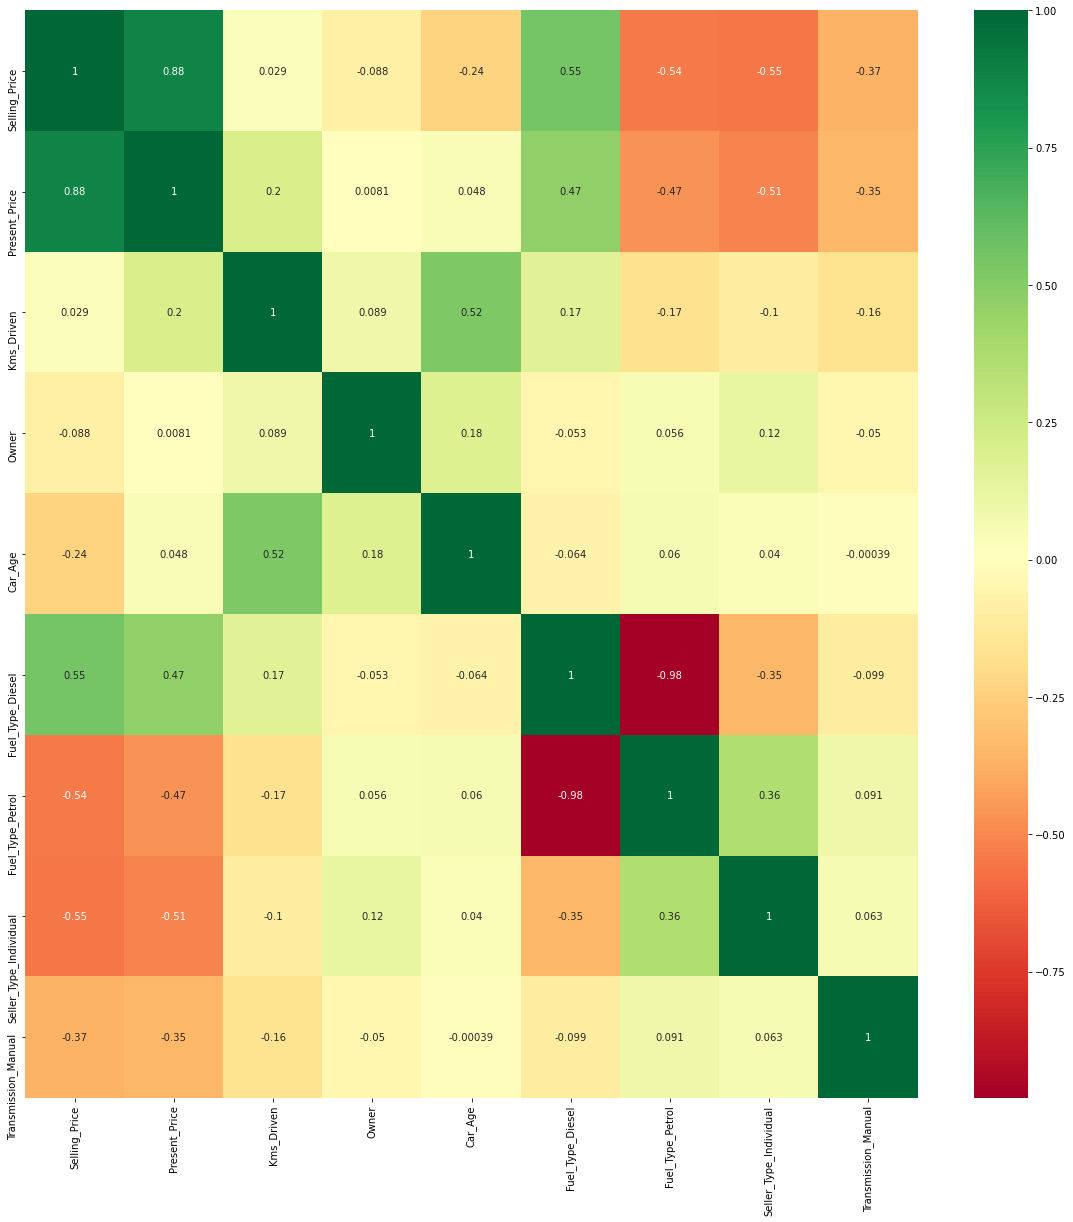

In [52]:
correlation_matrix = final_cardata.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
#plotting heatmap
g=sns.heatmap(final_cardata[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [53]:
X= final_cardata.iloc[:,1:]

y= final_cardata.iloc[:,0]
print(y)
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64
[0.37560092 0.04425679 0.00083025 0.07235062 0.22976007 0.0167952
 0.1225291  0.13787706]


<function matplotlib.pyplot.show(close=None, block=None)>

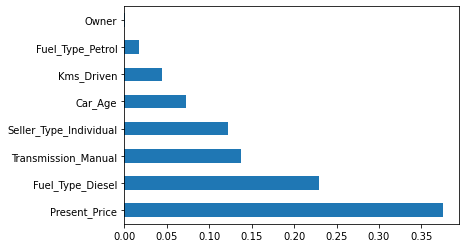

In [54]:
# plotting feature importance
features_imp = pd.Series(model.feature_importances_,index=X.columns)
features_imp.nlargest(10).plot(kind ='barh')
plt.show

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()

In [57]:
# hyperparameters tuning
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,25,50,75,100]
min_samples_leaf = [1,2,5,10]


In [58]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [59]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=rfg,param_distributions=random_grid,n_iter=10,cv=5,scoring="neg_mean_squared_error",verbose=4,random_state=42,n_jobs=2)
randomized_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 25, 50,
                                                              75, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=4)

C:\Users\Manav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-5.203149437064442


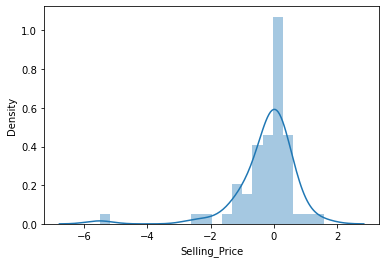

In [60]:
predictions = randomized_search.predict(X_test)
sns.distplot(y_test-predictions)
print(randomized_search.best_score_)


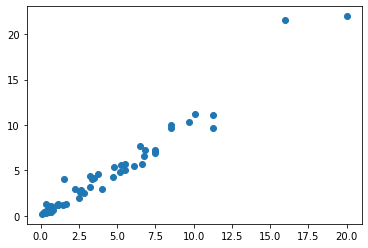

In [61]:
plt.scatter(y_test,predictions)
plt.show()

# Flight fare price

In [482]:
flight_fare = pd.read_excel("C:/Users/Manav/OneDrive/Documents/projects/FlightFare.xlsx")
flight_fare = flight_fare.drop(["Additional_Info"],axis=1)
# extracting day and month from the data_of_journeyabs
flight_fare['Journey_day'] = pd.to_datetime(flight_fare.Date_of_Journey, format= '%d/%m/%Y').dt.day
flight_fare['Journey_month'] = pd.to_datetime(flight_fare.Date_of_Journey, format= '%d/%m/%Y').dt.month
flight_fare.drop(['Date_of_Journey'],axis=1,inplace=True)

In [483]:
#Departure time 
flight_fare['Departure_time_hour'] = pd.to_datetime(flight_fare['Dep_Time']).dt.hour
flight_fare['Departure_time_min'] = pd.to_datetime(flight_fare['Dep_Time']).dt.minute
flight_fare.drop(['Dep_Time'],axis=1,inplace=True)


#Arrival time
flight_fare['Arrival_time_hour'] = pd.to_datetime(flight_fare['Arrival_Time']).dt.hour
flight_fare['Arrival_time_minute'] = pd.to_datetime(flight_fare['Arrival_Time']).dt.minute
flight_fare.drop(['Arrival_Time'],axis=1,inplace=True)


In [484]:
# chechking wheather all the samples in the data have the hours and minutes block or not
duration = list(flight_fare['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
# now we are extracting hours and minutes and removing h and m char
duration_hours =[]
duration_min = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_min.append(int(duration[i].split('m')[0].split()[-1]))
# now adding both the columns in to our dataframe and removing the duration feature
flight_fare["duration_hours"]= duration_hours
flight_fare["duration_min"] = duration_min
flight_fare.drop(["Duration"],axis=1,inplace=True)
flight_fare
 

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Departure_time_hour,Departure_time_min,Arrival_time_hour,Arrival_time_minute,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,12648,1,3,11,30,14,10,2,40


In [485]:
flight_fare['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

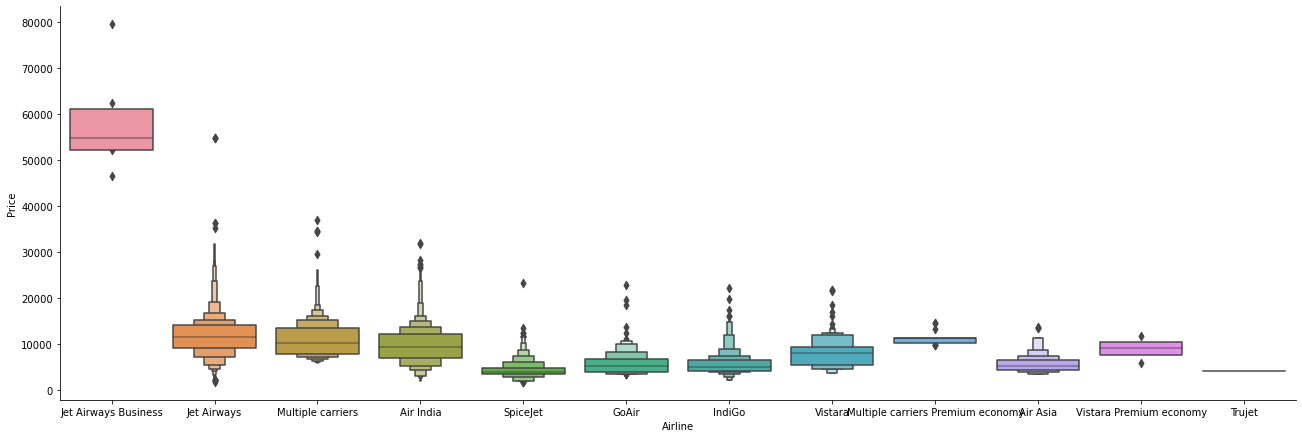

In [486]:
sns.catplot(x="Airline" ,y='Price',data = flight_fare.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [487]:
# now hence all of the airline data is nominal we will use on hot encoder
Airline = flight_fare[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [488]:
flight_fare.head(3)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Departure_time_hour,Departure_time_min,Arrival_time_hour,Arrival_time_minute,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,19,0


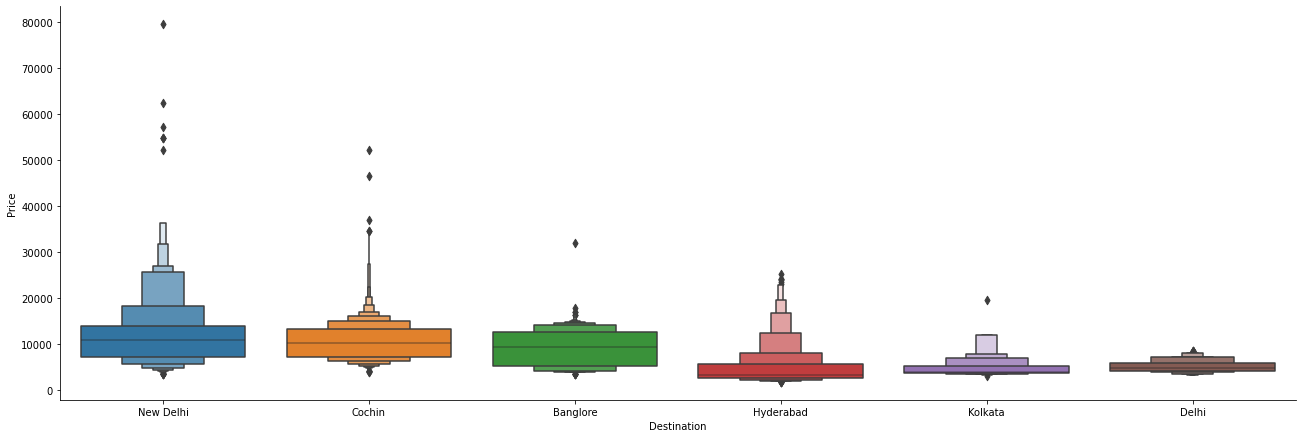

In [489]:
Source = flight_fare[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

Destination = flight_fare[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()
sns.catplot(x="Destination",y='Price',data=flight_fare.sort_values('Price',ascending=False),height=6,aspect=3,kind="boxen")
plt.show()


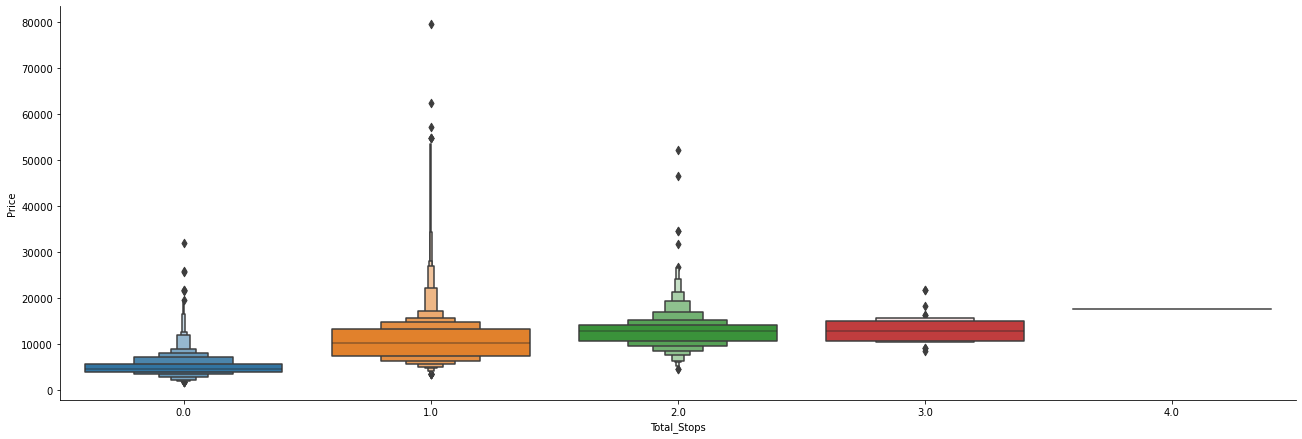

In [490]:
flight_fare.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
sns.catplot(x="Total_Stops",y="Price",data=flight_fare.sort_values("Price",ascending=False),height=6,kind="boxen",aspect=3)

In [491]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [492]:
flight_fare.drop(['Route'],axis=1,inplace=True)


In [ ]:
train_price = pd.concat([flight_fare, Airline ,Source ,Destination],axis=1)
train_price.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [494]:
train_price.dropna(inplace=True)
train_price.shape


(10682, 30)

#  Test Data Processing

In [495]:
test_data = pd.read_excel('C:/Users/Manav/OneDrive/Documents/projects/Test_Set.xlsx')
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [496]:
# test data preprocessing
flight_test_fare = test_data.drop(["Additional_Info"],axis=1)
# extracting day and month from the data_of_journeyabs
flight_test_fare['Journey_day'] = pd.to_datetime(flight_test_fare.Date_of_Journey, format= '%d/%m/%Y').dt.day
flight_test_fare['Journey_month'] = pd.to_datetime(flight_test_fare.Date_of_Journey, format= '%d/%m/%Y').dt.month
flight_test_fare.drop(['Date_of_Journey'],axis=1,inplace=True)

#Departure time 
flight_test_fare['Departure_time_hour'] = pd.to_datetime(flight_test_fare['Dep_Time']).dt.hour
flight_test_fare['Departure_time_min'] = pd.to_datetime(flight_test_fare['Dep_Time']).dt.minute
flight_test_fare.drop(['Dep_Time'],axis=1,inplace=True)


#Arrival time
flight_test_fare['Arrival_time_hour'] = pd.to_datetime(flight_test_fare['Arrival_Time']).dt.hour
flight_test_fare['Arrival_time_minute'] = pd.to_datetime(flight_test_fare['Arrival_Time']).dt.minute
flight_test_fare.drop(['Arrival_Time'],axis=1,inplace=True)
flight_test_fare.shape

# chechking wheather all the samples in the data have the hours and minutes block or not
duration_test = list(flight_test_fare['Duration'])
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + " 0m"
        else:
            duration_test[i] = "0h " + duration_test[i]
# now we are extracting hours and minutes and removing h and m char
duration_test_hours =[]
duration_test_min = []
for i in range(len(duration_test)):
    duration_test_hours.append(int(duration_test[i].split('h')[0]))
    duration_test_min.append(int(duration_test[i].split('m')[0].split()[-1]))
# now adding both the columns in to our dataframe and removing the duration feature
flight_test_fare["duration_test_hours"]= duration_test_hours
flight_test_fare["duration_test_min"] = duration_test_min
flight_test_fare.drop(["Duration"],axis=1,inplace=True)


In [497]:
# one hot encoding

# now hence all of the airline data is nominal we will use on hot encoder
Airline_test = flight_test_fare[['Airline']]
Airline_test = pd.get_dummies(Airline_test,drop_first=True)
Source_test = flight_test_fare[['Source']]
Source_test = pd.get_dummies(Source_test,drop_first=True)


Destination_test = flight_test_fare[['Destination']]
Destination_test = pd.get_dummies(Destination_test,drop_first=True)



In [498]:
flight_test_fare.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
flight_test_fare.drop(["Route"],axis=1,inplace = True)

In [499]:
data_test = pd.concat([flight_test_fare, Airline_test ,Source_test ,Destination_test],axis=1)
data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_test.shape

(2671, 28)

#  Feature Selection Time
# There are three methods for finding the most important features
# 1) Heatmap
# 2) feature_importance_
# 3) SelectKBest

In [500]:
train_price.columns


Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Departure_time_hour', 'Departure_time_min', 'Arrival_time_hour',
       'Arrival_time_minute', 'duration_hours', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [501]:
X = train_price.loc[:,['Total_Stops', 'Journey_day', 'Journey_month',
       'Departure_time_hour', 'Departure_time_min', 'Arrival_time_hour',
       'Arrival_time_minute', 'duration_hours', 'duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
y = train_price.loc[:,["Price"]]

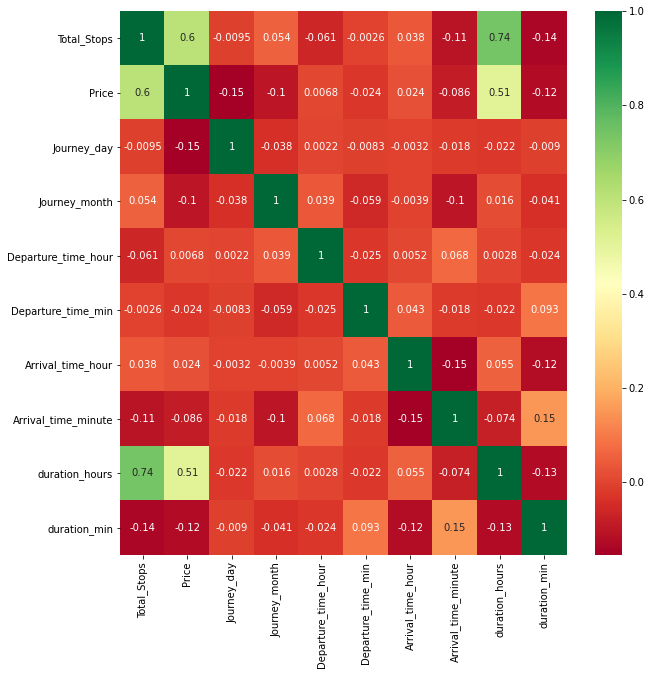

In [502]:
# now plotting the heat map
plt.figure(figsize=(10,10))
sns.heatmap(flight_fare.corr(),cmap="RdYlGn",annot=True)
plt.show()

In [505]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)


<ipython-input-505-b82b6a428ec6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

In [506]:
print(selection.feature_importances_)

[2.22453343e-01 1.44391817e-01 5.33992220e-02 2.37961919e-02
 2.13167194e-02 2.74230859e-02 1.87977999e-02 1.19167126e-01
 1.81091878e-02 8.68589380e-03 1.83531263e-03 1.86313399e-02
 1.45394136e-01 6.76612424e-02 1.84142510e-02 8.68659349e-04
 2.78225702e-03 8.97059767e-05 4.84727986e-03 8.36286682e-05
 5.53400600e-04 8.98401745e-03 3.23184803e-03 7.99459270e-03
 9.18844054e-03 1.86284724e-02 7.89658999e-03 4.70148954e-04
 2.49042894e-02]


In [509]:
features_imp = pd.Series(data=selection.feature_importances_,index=X.columns)


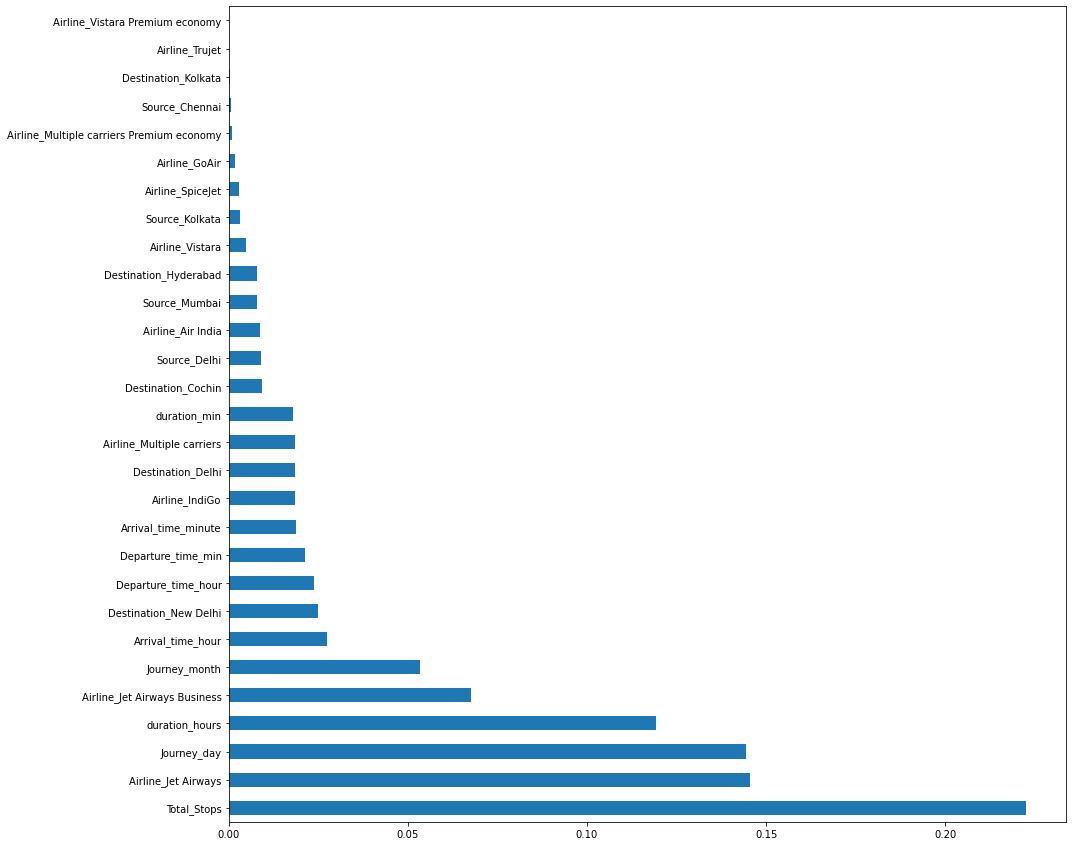

In [520]:
plt.figure(figsize=(15,15))
features_imp.nlargest(30).plot(kind="barh")
plt.show()

In [531]:
#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)



In [532]:
# using random forest regressor
flight_rfg = RandomForestRegressor()


In [540]:
# Hyperparameter
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,25,50,75,100]
min_samples_leaf = [1,2,5,10]
param_parameters = {"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}



In [541]:
flight_rsv=RandomizedSearchCV(estimator=flight_rfg,param_distributions=param_parameters,cv=5,scoring="neg_mean_squared_error",n_jobs=2,random_state=20,verbose=4)
flight_rsv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Manav\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 25, 50,
                                                              75, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=20, scoring='neg_mean_squared_error',
                   verbose=4)

In [554]:
y_predict_rsv = flight_rsv.predict(X_test)
rsv_score = flight_rsv.score(X_train,y_train)
rsv_score = (-rsv_score)**(1/2)
rsv_score

1308.6814220399278

In [67]:
import collections
default = {'theme':'Default','language':'eng','showIndex':True,'showFooter':True}
default2 = {'theme1':'Default','language1':'eng','showIndex1':True,'showFooter1':True}
cm = collections.ChainMap(default,default2)
cm.maps
cm2 = cm.new_child({'theme':'bluesky','theme1':'redsky'})

cm2.maps[0:3]






[{'theme': 'bluesky', 'theme1': 'redsky'},
 {'theme': 'Default',
  'language': 'eng',
  'showIndex': True,
  'showFooter': True},
 {'theme1': 'Default',
  'language1': 'eng',
  'showIndex1': True,
  'showFooter1': True}]

In [70]:
 import array
ba = array.array('i', range(10**6))
bl = list(range(10**6))
import sys
100*sys.getsizeof(ba)/sys.getsizeof(bl)
90.92989871246161
print(sys.getsizeof(ba))
print(sys.getsizeof(bl))

4091932
8000056


In [132]:
A = [9,30,6,7,3,6,4,6,4,2,7,16,7]

In [133]:
def mergesort(something):
    if len(something)<= 1:
        return something
    else:
        mid = len(something)//2
        left = something[:mid]
        right = something[mid:len(something)]
        mergesort(left)
        mergesort(right)
        
        # instantiating a variable
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                something[k] = left[i]
                i=i+1
                k=k+1
            else:
                something[k] = right[j]
                j = j+1
                k = k+1
                
        while i< len(left):
            
        #Assignment operation
            something[k] = left[i]
            i=i+1
            k=k+1
        while j< len(right):
            
         # Assignment operation
            something[k] = right[j]
            j=j+1
            k=k+1
    print('merging',something)
    return (something)
                
                
            

In [134]:
mergesort(A)

merging [6, 30]
merging [6, 9, 30]
merging [3, 6]
merging [3, 6, 7]
merging [3, 6, 6, 7, 9, 30]
merging [4, 6]
merging [4, 4, 6]
merging [2, 7]
merging [7, 16]
merging [2, 7, 7, 16]
merging [2, 4, 4, 6, 7, 7, 16]
merging [2, 3, 4, 4, 6, 6, 6, 7, 7, 7, 9, 16, 30]


[2, 3, 4, 4, 6, 6, 6, 7, 7, 7, 9, 16, 30]

In [10]:
class Singlelinkedlist():
    def __init_(self):
        self.tail = None
    def append(self,data):
        node = Node(data)
        if self.tail == None:
            self.tail = node
        else:
            current = self.tail
            while current.next:
                 current = current.next
            current.next = node
                
            
            
        

In [11]:
Singlelinkedlist.append(1)

TypeError: append() missing 1 required positional argument: 'data'

In [45]:
# This is a sales problem where we have to return the country and the sales done per month.
def sales(len_arr,states,month,array):
    country=0
    for i in range(len_arr):
        if i%states==0:
            country+=1
        if i == month-1: 
            print(country,array[i])
sales(6,8,6,[2,1,9,3,1,4,6,7])

        
            
            
        
    

1 4


1 4
